<a href="https://www.kaggle.com/code/samarchhetri/bank-loan-defaulter-exploratory-data-analysis?scriptVersionId=131509815" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#### This case study aims to give us an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that we have learnt in the EDA module, we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
application_data = pd.read_csv('/kaggle/input/loan-defaulter/application_data.csv')

# Previous Application data
previous_app_data = pd.read_csv('/kaggle/input/loan-defaulter/previous_application.csv')
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Application Data

In [3]:
# Numeric and Categorical features
numeric_cols = application_data.select_dtypes(exclude='object').columns
cat_cols = application_data.select_dtypes('object').columns

In [4]:
# Checking for missing values
missing_value_features = []   # List to store missing value's features

for features in application_data.columns:
    if application_data[features].isna().sum()>=1:
        missing_value_features.append(features)   # Add to the list


In [5]:
# Missing values
missing_df = application_data[missing_value_features].isna().sum().reset_index(name='missing_values')

# Missing value percentage
missing_df['missing_value_percent'] = (missing_df['missing_values']/application_data.shape[0])*100
missing_df

,index,missing_values,missing_value_percent
0,AMT_ANNUITY,12,0.003902
1,AMT_GOODS_PRICE,278,0.090403
2,NAME_TYPE_SUITE,1292,0.420148
3,OWN_CAR_AGE,202929,65.990810
4,OCCUPATION_TYPE,96391,31.345545
...,...,...,...
62,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
63,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
64,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
65,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631


In [6]:
# Columns with missing percent >5
missing_df.loc[missing_df['missing_value_percent']>=5, :]

,index,missing_values,missing_value_percent
3,OWN_CAR_AGE,202929,65.990810
4,OCCUPATION_TYPE,96391,31.345545
6,EXT_SOURCE_1,173378,56.381073
8,EXT_SOURCE_3,60965,19.825307
9,APARTMENTS_AVG,156061,50.749729
10,BASEMENTAREA_AVG,179943,58.515956
11,YEARS_BEGINEXPLUATATION_AVG,150007,48.781019
12,YEARS_BUILD_AVG,204488,66.497784
13,COMMONAREA_AVG,214865,69.872297
14,ELEVATORS_AVG,163891,53.295980


##### Fifety-seven features have missing values more than 5%. And, remaining ten features have less than 5% missing values.

In [7]:
# Checking for features with missing value percent >40
len(missing_df.loc[missing_df['missing_value_percent']>40, :])

49

In [8]:
# Features with missing values percent > 40
features_with_missing_values_greater_than_40_percent = missing_df[missing_df['missing_value_percent']>40]['index'].values
features_with_missing_values_greater_than_40_percent

array(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG',
       'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
       'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NON

In [9]:
# Drop features 
application_data.drop(columns=features_with_missing_values_greater_than_40_percent, inplace=True)

##### We have dropped the features with missing value percent greater than 40.

In [10]:
# Features with flag details
flag_cols = []  # List to store flag features

for col in  application_data.columns:
    if col.startswith("FLAG_"):
        flag_cols.append(col)   # Add the features name to list
        
len(flag_cols)
        

28

In [11]:
# Flag features with target
flag_with_target = application_data[flag_cols + ['TARGET']]
flag_with_target.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


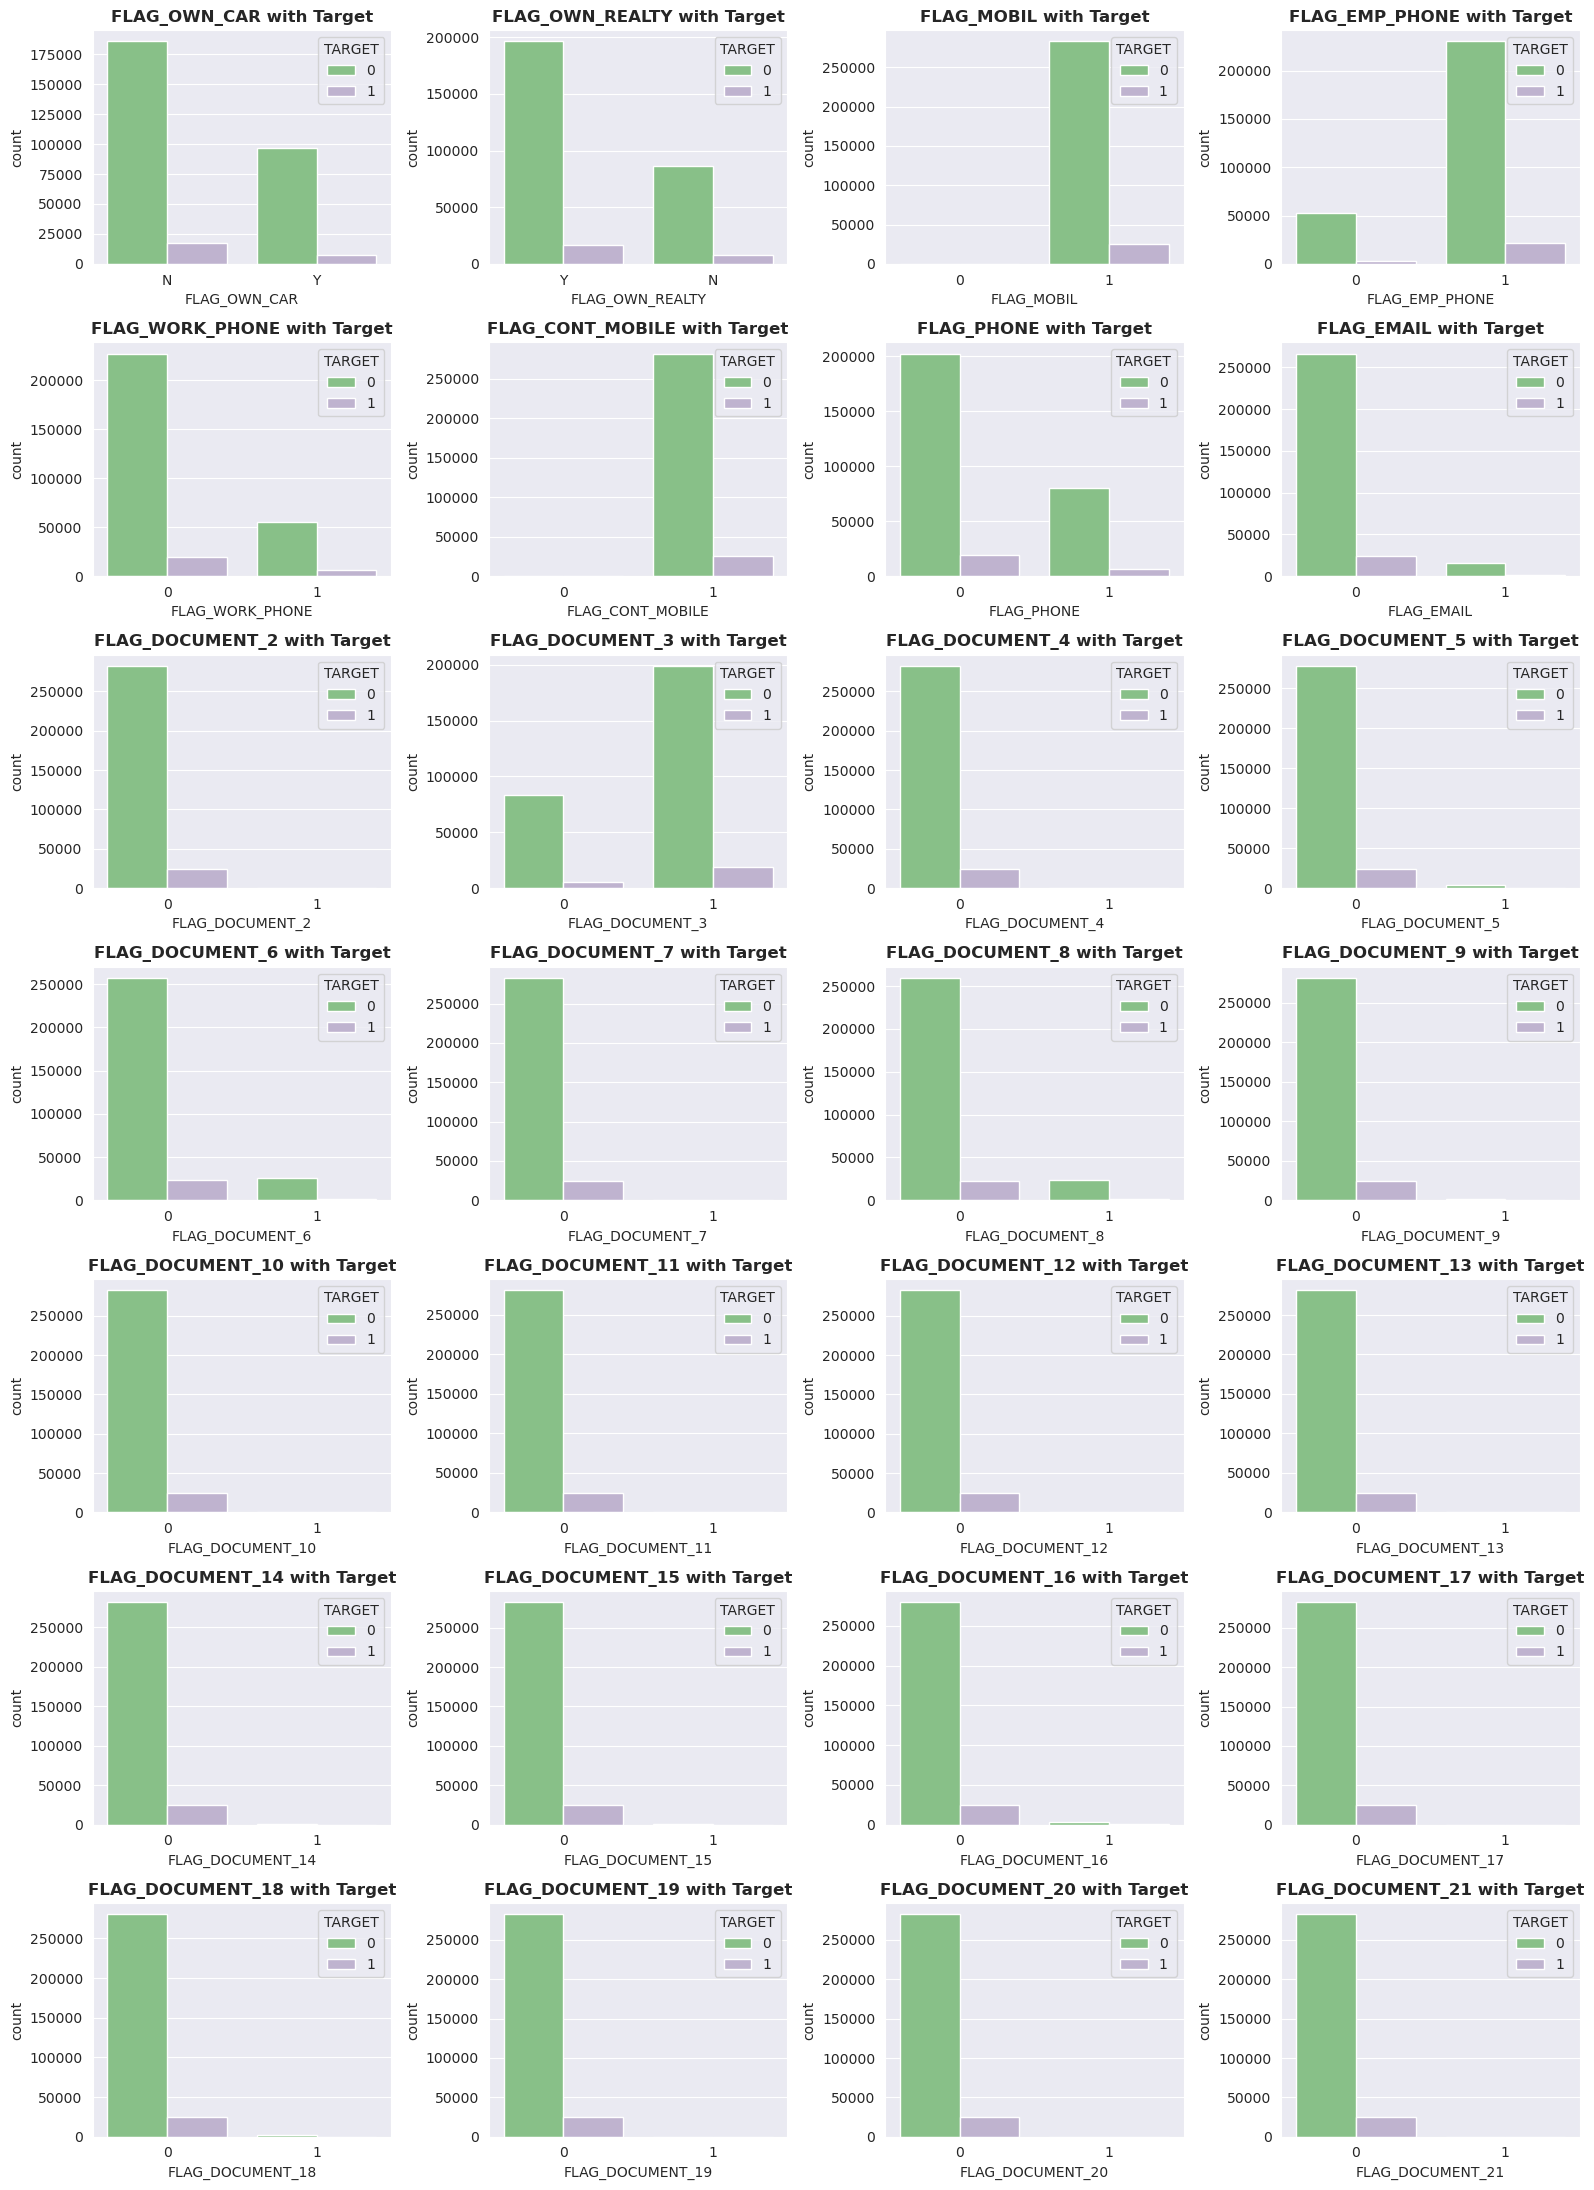

In [12]:
# Countplot of all flag features with target
plt.figure(figsize=(16,22))
for index, c in enumerate(flag_with_target.columns):
    if c=='TARGET':  # Exclude target feature
        continue
    plt.subplot(7,4, index+1)
    sns.countplot(x=c, data=flag_with_target, palette='Accent', hue='TARGET')
    plt.title(f"{c} with Target", fontweight='bold')
    
plt.tight_layout()    

##### As can be seen, most of the clients have provided 'Emp_Phone', 'Document_3' deatils only. Remaining deatils are almost vaccant.

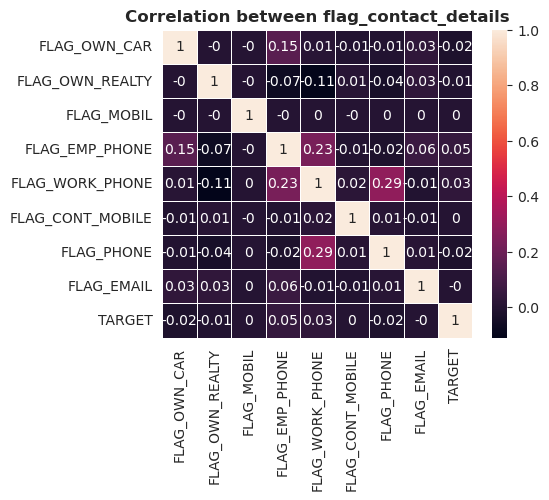

In [13]:
# Flag features with contact details
flag_contact_details =['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','TARGET']
flag_contact_details_df = application_data[flag_contact_details]
# Replace 'No'--0 and 'Yes'--1
flag_contact_details_df['FLAG_OWN_CAR'] = flag_contact_details_df['FLAG_OWN_CAR'].replace({'N':0, 'Y':1})
flag_contact_details_df['FLAG_OWN_REALTY'] = flag_contact_details_df['FLAG_OWN_REALTY'].replace({'N':0, 'Y':1})

plt.figure(figsize=(5,4))
sns.heatmap(np.round(flag_contact_details_df.corr(),2), linewidths=0.5,annot=True)
plt.title("Correlation between flag_contact_details", fontweight='bold')
plt.show()

In [14]:
# Drop features with flag contanct details
flag_features_to_drop = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']

application_flag_removed = application_data.drop(columns=flag_features_to_drop)
application_flag_removed.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


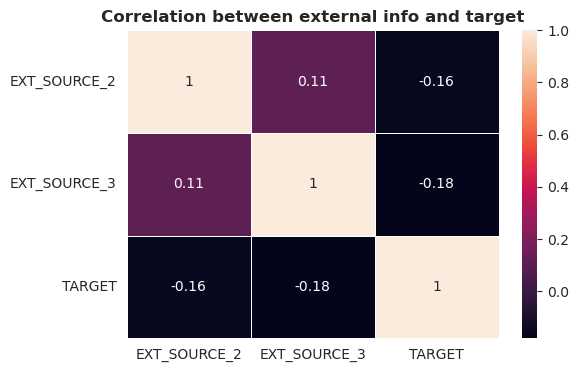

In [15]:
# Correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(round(application_flag_removed[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']].corr(),2),
            linewidths=0.5, annot=True)
plt.title("Correlation between external info and target", fontweight='bold')
plt.show()

In [16]:
# Drop features
application_data_1 = application_flag_removed.drop(columns=['EXT_SOURCE_2','EXT_SOURCE_3'])

In [17]:
flag_document_features = []  # List to store flag features

for i in application_data_1.columns:
    if i.startswith("FLAG_"):
        flag_document_features.append(i)  # Add features to list
        
len(flag_document_features)

20

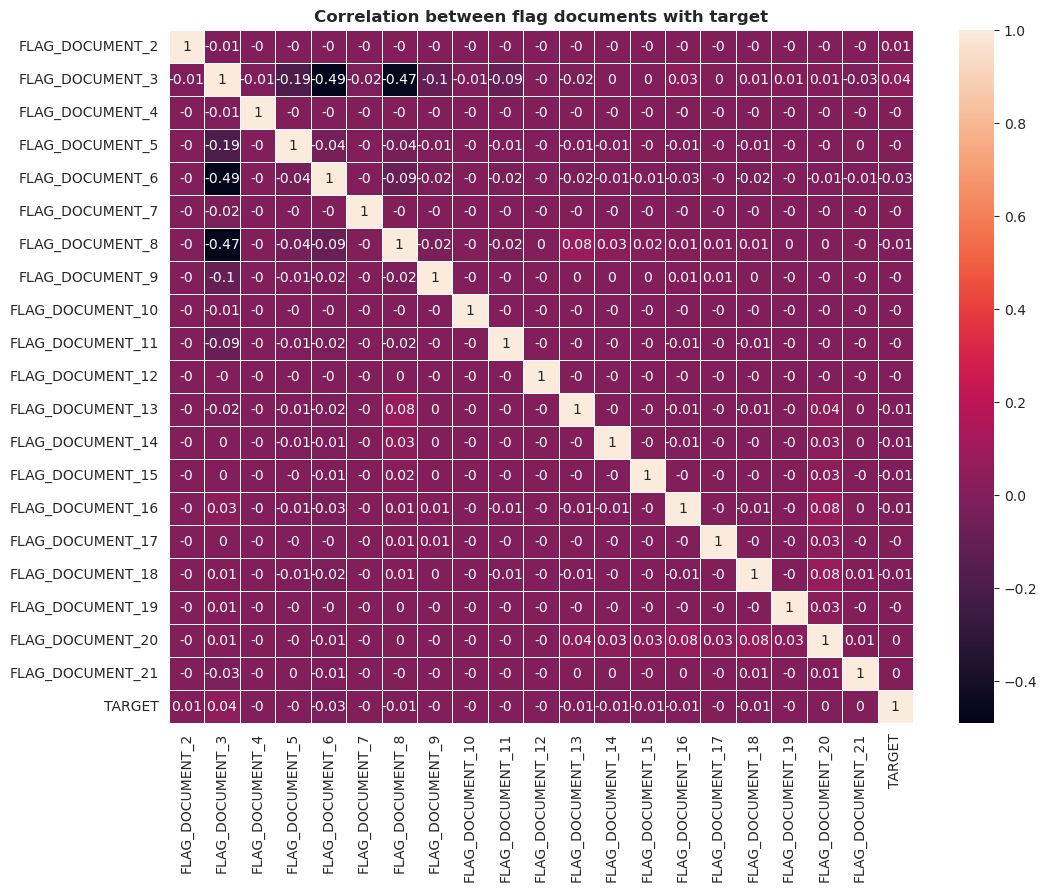

In [18]:
flag_document_corr = round(application_data_1[flag_document_features+['TARGET']].corr(),2)

# Heatmap for correlation
plt.figure(figsize=(12,9))
sns.heatmap(flag_document_corr, annot=True, linewidths=0.5)
plt.title("Correlation between flag documents with target", fontweight='bold')
plt.show()

In [19]:
# Drop irrelevent features
application_data_2 = application_data_1.drop(columns=flag_document_features)

##### None of the features have relation with target. So, we drop them all.

## Feature Engineeing

### Missing value Imputation

In [20]:
# Missing values
application_data_2.isna().sum().sort_values(ascending=False)

OCCUPATION_TYPE                96391
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
NAME_TYPE_SUITE                 1292
DEF_60_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
HOUR_APPR_PROCESS_START            0
ORGANIZATION_TYPE                  0
LIVE_CITY_NOT_WORK_CITY            0
REG_CITY_NOT_WORK_CITY             0
REG_CITY_NOT_LIVE_CITY             0
LIVE_REGION_NOT_WORK_REGION        0
REG_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_LIVE_REGION         0
SK_ID_CURR                         0
WEEKDAY_APPR_PROCESS_START         0
REGION_RATING_CLIENT_W_CITY        0
N

In [21]:
# CNT_Fam_Members
application_data_2['CNT_FAM_MEMBERS'].value_counts()
# Fill with mode 
application_data_2['CNT_FAM_MEMBERS'] = application_data_2['CNT_FAM_MEMBERS'].fillna((application_data_2['CNT_FAM_MEMBERS'].mode()[0]))
application_data_2['DAYS_LAST_PHONE_CHANGE'] = application_data_2['DAYS_LAST_PHONE_CHANGE'].fillna((application_data_2['DAYS_LAST_PHONE_CHANGE'].mode()[0]))

In [22]:
# Occupation type 
application_data_2['OCCUPATION_TYPE'].value_counts()/application_data_2.shape[0]

# Fill missing values with a new class 'Unknown'
application_data_2['OCCUPATION_TYPE'] = application_data_2['OCCUPATION_TYPE'].fillna('Unknown')

In [23]:
# AMT_ANNUITY
application_data_2[application_data_2['AMT_ANNUITY'].isna()].index
# Values compeletely missing at random

Int64Index([ 47531,  50035,  51594,  55025,  59934,  75873,  89343, 123872,
            207186, 227939, 239329, 241835],
           dtype='int64')

In [24]:
# Fill missing values with mean
application_data_2['AMT_ANNUITY'] = application_data_2['AMT_ANNUITY'].fillna((application_data_2['AMT_ANNUITY'].mean()))

In [25]:
# Fill the missing values with mode
application_data_2['DEF_60_CNT_SOCIAL_CIRCLE'] = application_data_2['DEF_60_CNT_SOCIAL_CIRCLE'].fillna((application_data_2['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0]))
application_data_2['OBS_30_CNT_SOCIAL_CIRCLE'] = application_data_2['OBS_30_CNT_SOCIAL_CIRCLE'].fillna((application_data_2['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0]))
application_data_2['DEF_30_CNT_SOCIAL_CIRCLE'] = application_data_2['DEF_30_CNT_SOCIAL_CIRCLE'].fillna((application_data_2['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0]))
application_data_2['OBS_60_CNT_SOCIAL_CIRCLE'] = application_data_2['OBS_60_CNT_SOCIAL_CIRCLE'].fillna((application_data_2['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0]))

In [26]:
# NAME_TYPE_SUITE
application_data_2['NAME_TYPE_SUITE'].value_counts()

# 'Unaccompanied' class is purely dominating the distribution. So, we use it to fill the missing values
application_data_2['NAME_TYPE_SUITE'] = application_data_2['NAME_TYPE_SUITE'].fillna((application_data_2['NAME_TYPE_SUITE'].mode()[0]))

In [27]:
# AMT_GOODS_PRICE
application_data_2['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [28]:
# Fill with median value
application_data_2['AMT_GOODS_PRICE'] = application_data_2['AMT_GOODS_PRICE'].fillna((application_data_2['AMT_GOODS_PRICE'].median()))

In [29]:
application_data_2.isna().sum().sort_values(ascending=False)

AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
LIVE_CITY_NOT_WORK_CITY            0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
DEF_30_CNT_SOCIAL_CIRCLE           0
ORGANIZATION_TYPE                  0
OBS_30_CNT_SOCIAL_CIRCLE           0
REGION_RATING_CLIENT_W_CITY        0
OBS_60_CNT_SOCIAL_CIRCLE           0
DEF_60_CNT_SOCIAL_CIRCLE           0
DAYS_LAST_PHONE_CHANGE             0
WEEKDAY_APPR_PROCESS_START         0
SK_ID_CURR                         0
TARGET                             0
NAME_INCOME_TYPE                   0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
CNT_CHILDREN                       0
A

In [30]:
application_data_2[application_data_2['AMT_REQ_CREDIT_BUREAU_DAY'].isna()].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
9,100012,0,Revolving loans,M,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,Laborers,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,2.0,0.0,2.0,0.0,-1673.0,NaN,NaN,NaN,NaN,NaN,NaN
14,100018,0,Cash loans,F,0,189000.0,773680.5,32778.0,679500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010006,-14583,-203,-615.0,-2056,Laborers,2.0,2,1,MONDAY,9,0,0,0,0,0,0,Transport: type 2,0.0,0.0,0.0,0.0,-188.0,NaN,NaN,NaN,NaN,NaN,NaN
17,100021,0,Revolving loans,F,1,81000.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010966,-9776,-191,-4143.0,-2427,Laborers,3.0,2,2,MONDAY,10,0,0,0,1,1,0,Construction,4.0,0.0,4.0,0.0,-2811.0,NaN,NaN,NaN,NaN,NaN,NaN
20,100024,0,Revolving loans,M,0,135000.0,427500.0,21375.0,427500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.015221,-18252,-4286,-298.0,-1800,Laborers,2.0,2,2,FRIDAY,13,0,0,0,0,0,0,Self-employed,0.0,0.0,0.0,0.0,-296.0,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Fetching the columns
amt_req_features = []  # List to store features

for k in application_data_2.columns:
    if k.startswith('AMT_REQ_CREDIT_BUREAU_'):
        amt_req_features.append(k)  # Add features to list
        
amt_req_features
        

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

##### As can be seen, the six features have same amount of missing values at same index number.

In [32]:
# Impute missing values with median
for col in amt_req_features:
    application_data_2[col] = application_data_2[col].fillna((application_data_2[col].median()))

In [33]:
application_data_2.isna().sum().sort_values(ascending=False)

SK_ID_CURR                     0
OBS_30_CNT_SOCIAL_CIRCLE       0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
DEF_30_CNT_SOCIAL_CIRCLE       0
REGION_RATING_CLIENT_W_CITY    0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
DAYS_LAST_PHONE_CHANGE         0
AMT_REQ_CREDIT_BUREAU_HOUR     0
AMT_REQ_CREDIT_BUREAU_DAY      0
AMT_REQ_CREDIT_BUREAU_WEEK     0
AMT_REQ_CREDIT_BUREAU_MON      0
AMT_REQ_CREDIT_BUREAU_QRT      0
WEEKDAY_APPR_PROCESS_START     0
REGION_RATING_CLIENT           0
TARGET                         0
NAME_INCOME_TYPE               0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_

In [34]:
application_data_2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Value Modification

In [35]:
days_cols = []   # List to store features with days value

for i in application_data.columns:
    if i.startswith("DAYS"):
        days_cols.append(i)   # Add to list
        
days_cols
        

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

##### We have negative values in these columns. So, we need to change it to positive.

In [36]:
# Convert negative values to absolute
for i in days_cols:
    application_data_2[i] = abs(application_data_2[i])

### Binning

In [37]:
application_data_2.select_dtypes(include='float')

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,3648.0,1.0,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,1186.0,2.0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,4260.0,1.0,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,9833.0,2.0,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,121500.0,513000.0,21865.5,513000.0,0.028663,4311.0,1.0,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,0.032561,8456.0,1.0,0.0,0.0,0.0,0.0,273.0,0.0,0.0,0.0,0.0,0.0,1.0
307507,72000.0,269550.0,12001.5,225000.0,0.025164,4388.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,153000.0,677664.0,29979.0,585000.0,0.005002,6737.0,1.0,6.0,0.0,6.0,0.0,1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,171000.0,370107.0,20205.0,319500.0,0.005313,2562.0,2.0,0.0,0.0,0.0,0.0,322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Number of unique values
application_data_2.nunique().sort_values(ascending=False)

SK_ID_CURR                     307511
DAYS_BIRTH                      17460
DAYS_REGISTRATION               15688
AMT_ANNUITY                     13673
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
AMT_CREDIT                       5603
DAYS_LAST_PHONE_CHANGE           3773
AMT_INCOME_TOTAL                 2548
AMT_GOODS_PRICE                  1002
REGION_POPULATION_RELATIVE         81
ORGANIZATION_TYPE                  58
OBS_60_CNT_SOCIAL_CIRCLE           33
OBS_30_CNT_SOCIAL_CIRCLE           33
AMT_REQ_CREDIT_BUREAU_YEAR         25
HOUR_APPR_PROCESS_START            24
AMT_REQ_CREDIT_BUREAU_MON          24
OCCUPATION_TYPE                    19
CNT_FAM_MEMBERS                    17
CNT_CHILDREN                       15
AMT_REQ_CREDIT_BUREAU_QRT          11
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
NAME_INCOME_TYPE                    8
WEEKDAY_APPR

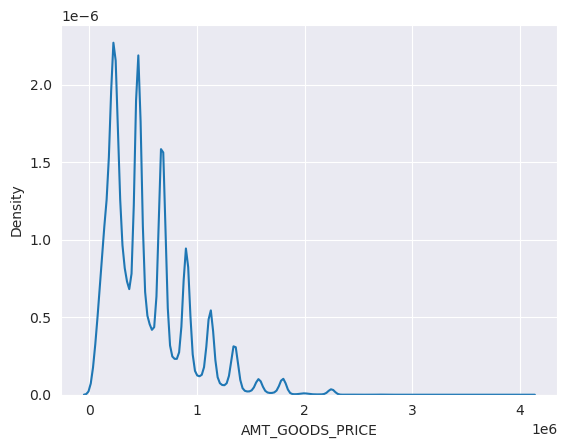

In [39]:
# KDE-plot
sns.kdeplot(data=application_data_2, x='AMT_GOODS_PRICE')
plt.show()

<Axes: xlabel='AMT_GOODS_PRICE'>

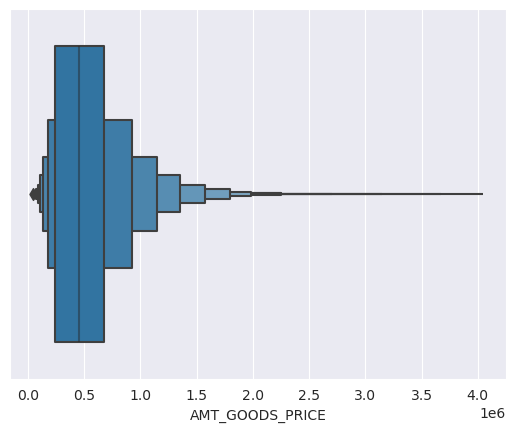

In [40]:
sns.boxenplot(data=application_data_2, x='AMT_GOODS_PRICE')

In [41]:
# AMT_GOODS_PRICE
application_data_2['AMT_GOODS_PRICE'].quantile([0.1,0.25,0.50,0.75,0.90])

0.10     180000.0
0.25     238500.0
0.50     450000.0
0.75     679500.0
0.90    1093500.0
Name: AMT_GOODS_PRICE, dtype: float64

<Axes: xlabel='AMT_CREDIT', ylabel='Count'>

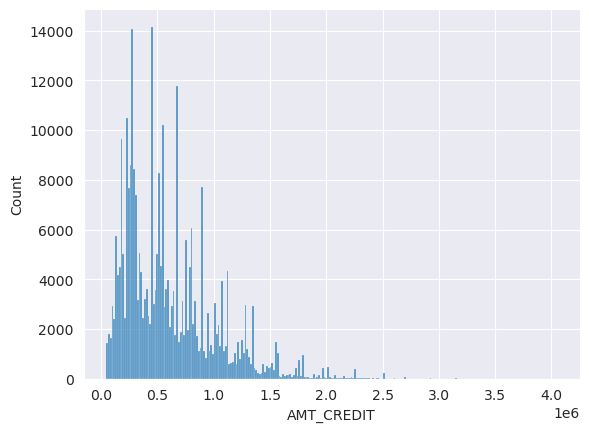

In [42]:
sns.histplot(application_data_2['AMT_CREDIT'])

In [43]:
application_data_2['AMT_CREDIT'].describe().loc[['min','max']]

min      45000.0
max    4050000.0
Name: AMT_CREDIT, dtype: float64

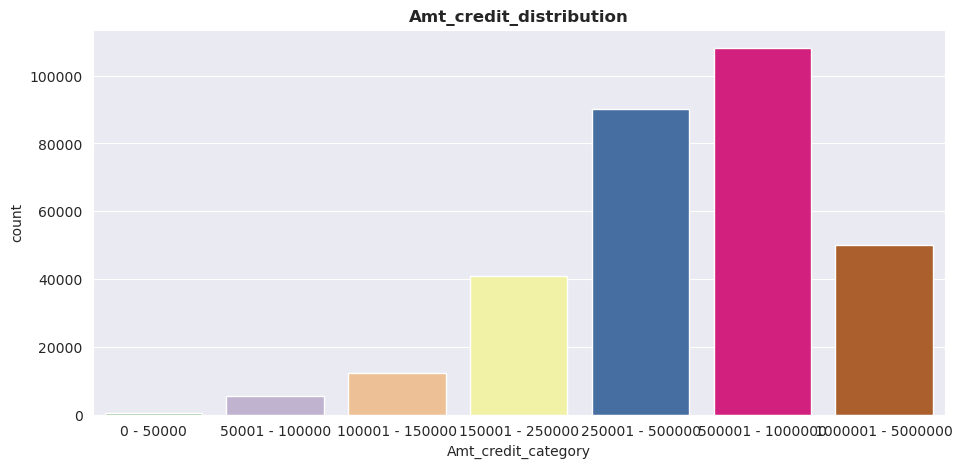

In [44]:
# Amt_Credit
labels= ['0 - 50000','50001 - 100000','100001 - 150000','150001 - 250000','250001 - 500000','500001 - 1000000', '1000001 - 5000000']
application_data_2['Amt_credit_category'] = pd.cut(application_data_2['AMT_CREDIT'], bins=[0,50000,100000,150000,250000,500000,1000000,5000000], labels=labels)

plt.figure(figsize=(11,5))
sns.countplot(x=application_data_2['Amt_credit_category'], palette='Accent')
plt.title('Amt_credit_distribution', fontweight='bold')
plt.show()

##### As can be seen, class '250002 - 500000' and '500001 - 1000000' has maximum frequency. And, below 50000 has low number of frequency.

In [45]:
display(application_data_2['AMT_GOODS_PRICE'].quantile([0.1,0.25,0.50,0.75,0.90]))
display(application_data_2['AMT_GOODS_PRICE'].max())

0.10     180000.0
0.25     238500.0
0.50     450000.0
0.75     679500.0
0.90    1093500.0
Name: AMT_GOODS_PRICE, dtype: float64

4050000.0

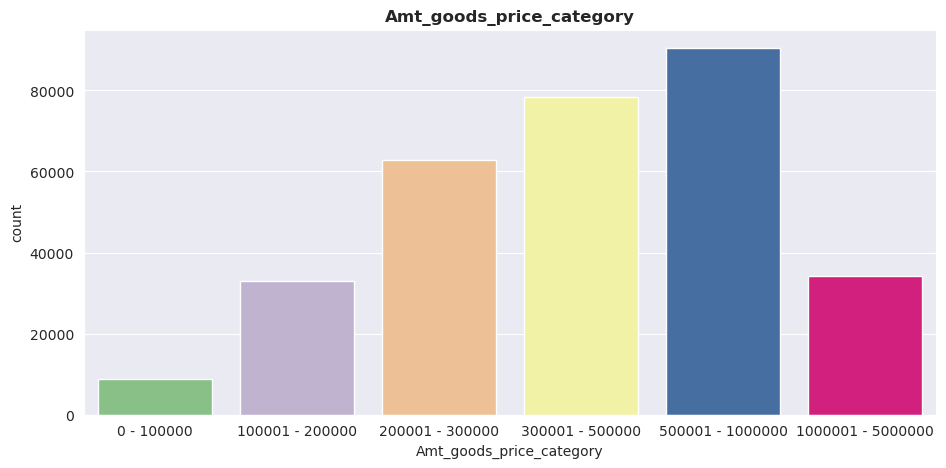

In [46]:
# AMT_GOODS_PRICE
labels= ['0 - 100000','100001 - 200000','200001 - 300000','300001 - 500000','500001 - 1000000','1000001 - 5000000']
application_data_2['Amt_goods_price_category'] = pd.cut(application_data_2['AMT_GOODS_PRICE'], bins=[0,100000,200000,300000,500000,1000000,5000000], labels=labels)

plt.figure(figsize=(11,5))
sns.countplot(x=application_data_2['Amt_goods_price_category'], palette='Accent')
plt.title('Amt_goods_price_category', fontweight='bold')
plt.show()

##### As can be seen, maximum number of goods price falls under '200000 to 1000000' range.

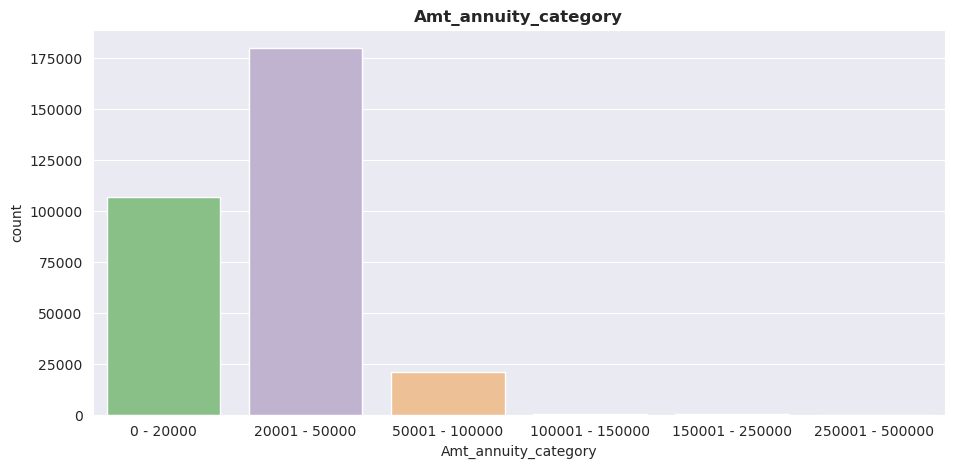

In [47]:
# AMT_ANNUITY
labels= ['0 - 20000','20001 - 50000','50001 - 100000','100001 - 150000','150001 - 250000','250001 - 500000']
application_data_2['Amt_annuity_category'] = pd.cut(application_data_2['AMT_ANNUITY'], bins=[0,20000,50000,100000,150000,250000,300000], labels=labels)

plt.figure(figsize=(11,5))
sns.countplot(x=application_data_2['Amt_annuity_category'], palette='Accent')
plt.title('Amt_annuity_category', fontweight='bold')
plt.show()

##### As can be seen, annuity amount falls maximum on '20000 to 50000' range. And, more than 100000 annuity is very low.

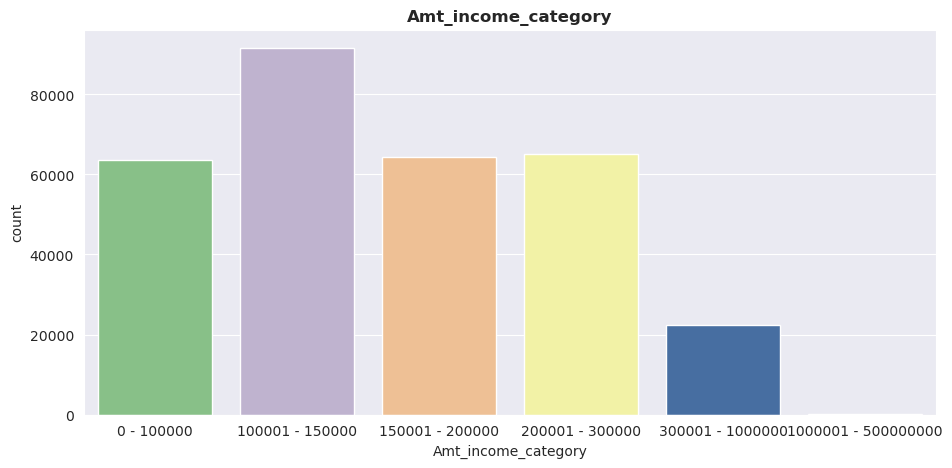

In [48]:
# AMT_INCOME_TOTAL
labels= ['0 - 100000','100001 - 150000','150001 - 200000','200001 - 300000','300001 - 1000000','1000001 - 500000000']
application_data_2['Amt_income_category'] = pd.cut(application_data_2['AMT_INCOME_TOTAL'], bins=[0,100000,150000,200000,300000,1000000,500000000], labels=labels)

plt.figure(figsize=(11,5))
sns.countplot(x=application_data_2['Amt_income_category'], palette='Accent')
plt.title('Amt_income_category', fontweight='bold')
plt.show()

##### As can be seen, client income falls heavily between 100000 to 300000 range. Among them, highest is between 100000 to 150000.

## Data Analysis

In [49]:
# Data types
application_data_2.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
dtype: int64

In [50]:
application_data_2.select_dtypes('object')

,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion
...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services
307507,Cash loans,F,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,Unknown,MONDAY,XNA
307508,Cash loans,F,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School
307509,Cash loans,F,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1


In [51]:
# NAME_CONTRACT_TYPE
application_data_2['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

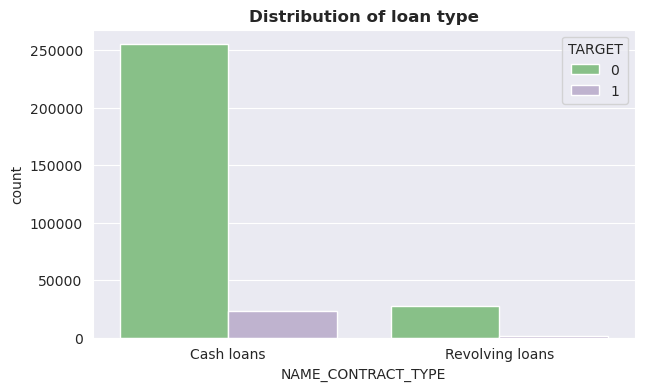

In [52]:
# Countplot
plt.figure(figsize=(7,4))
sns.countplot(x='NAME_CONTRACT_TYPE', data=application_data_2, palette='Accent', hue='TARGET')
plt.title("Distribution of loan type", fontweight='bold')
plt.show()

##### As can be seen, most of the clients have taken Cash loan. Those who have taken cash loan defaulted the loan most.

In [53]:
# NAME_CONTRACT_TYPE
application_data_2['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [54]:
# Dataframe for loan type with target
loan_type_with_target = application_data_2.groupby(['NAME_CONTRACT_TYPE', 'TARGET']).size().reset_index(name='count')

loan_type_with_target['Percentage'] = round((loan_type_with_target['count']/len(application_data_2['NAME_CONTRACT_TYPE']))*100,2)
loan_type_with_target

,NAME_CONTRACT_TYPE,TARGET,count,Percentage
0,Cash loans,0,255011,82.93
1,Cash loans,1,23221,7.55
2,Revolving loans,0,27675,9.00
3,Revolving loans,1,1604,0.52


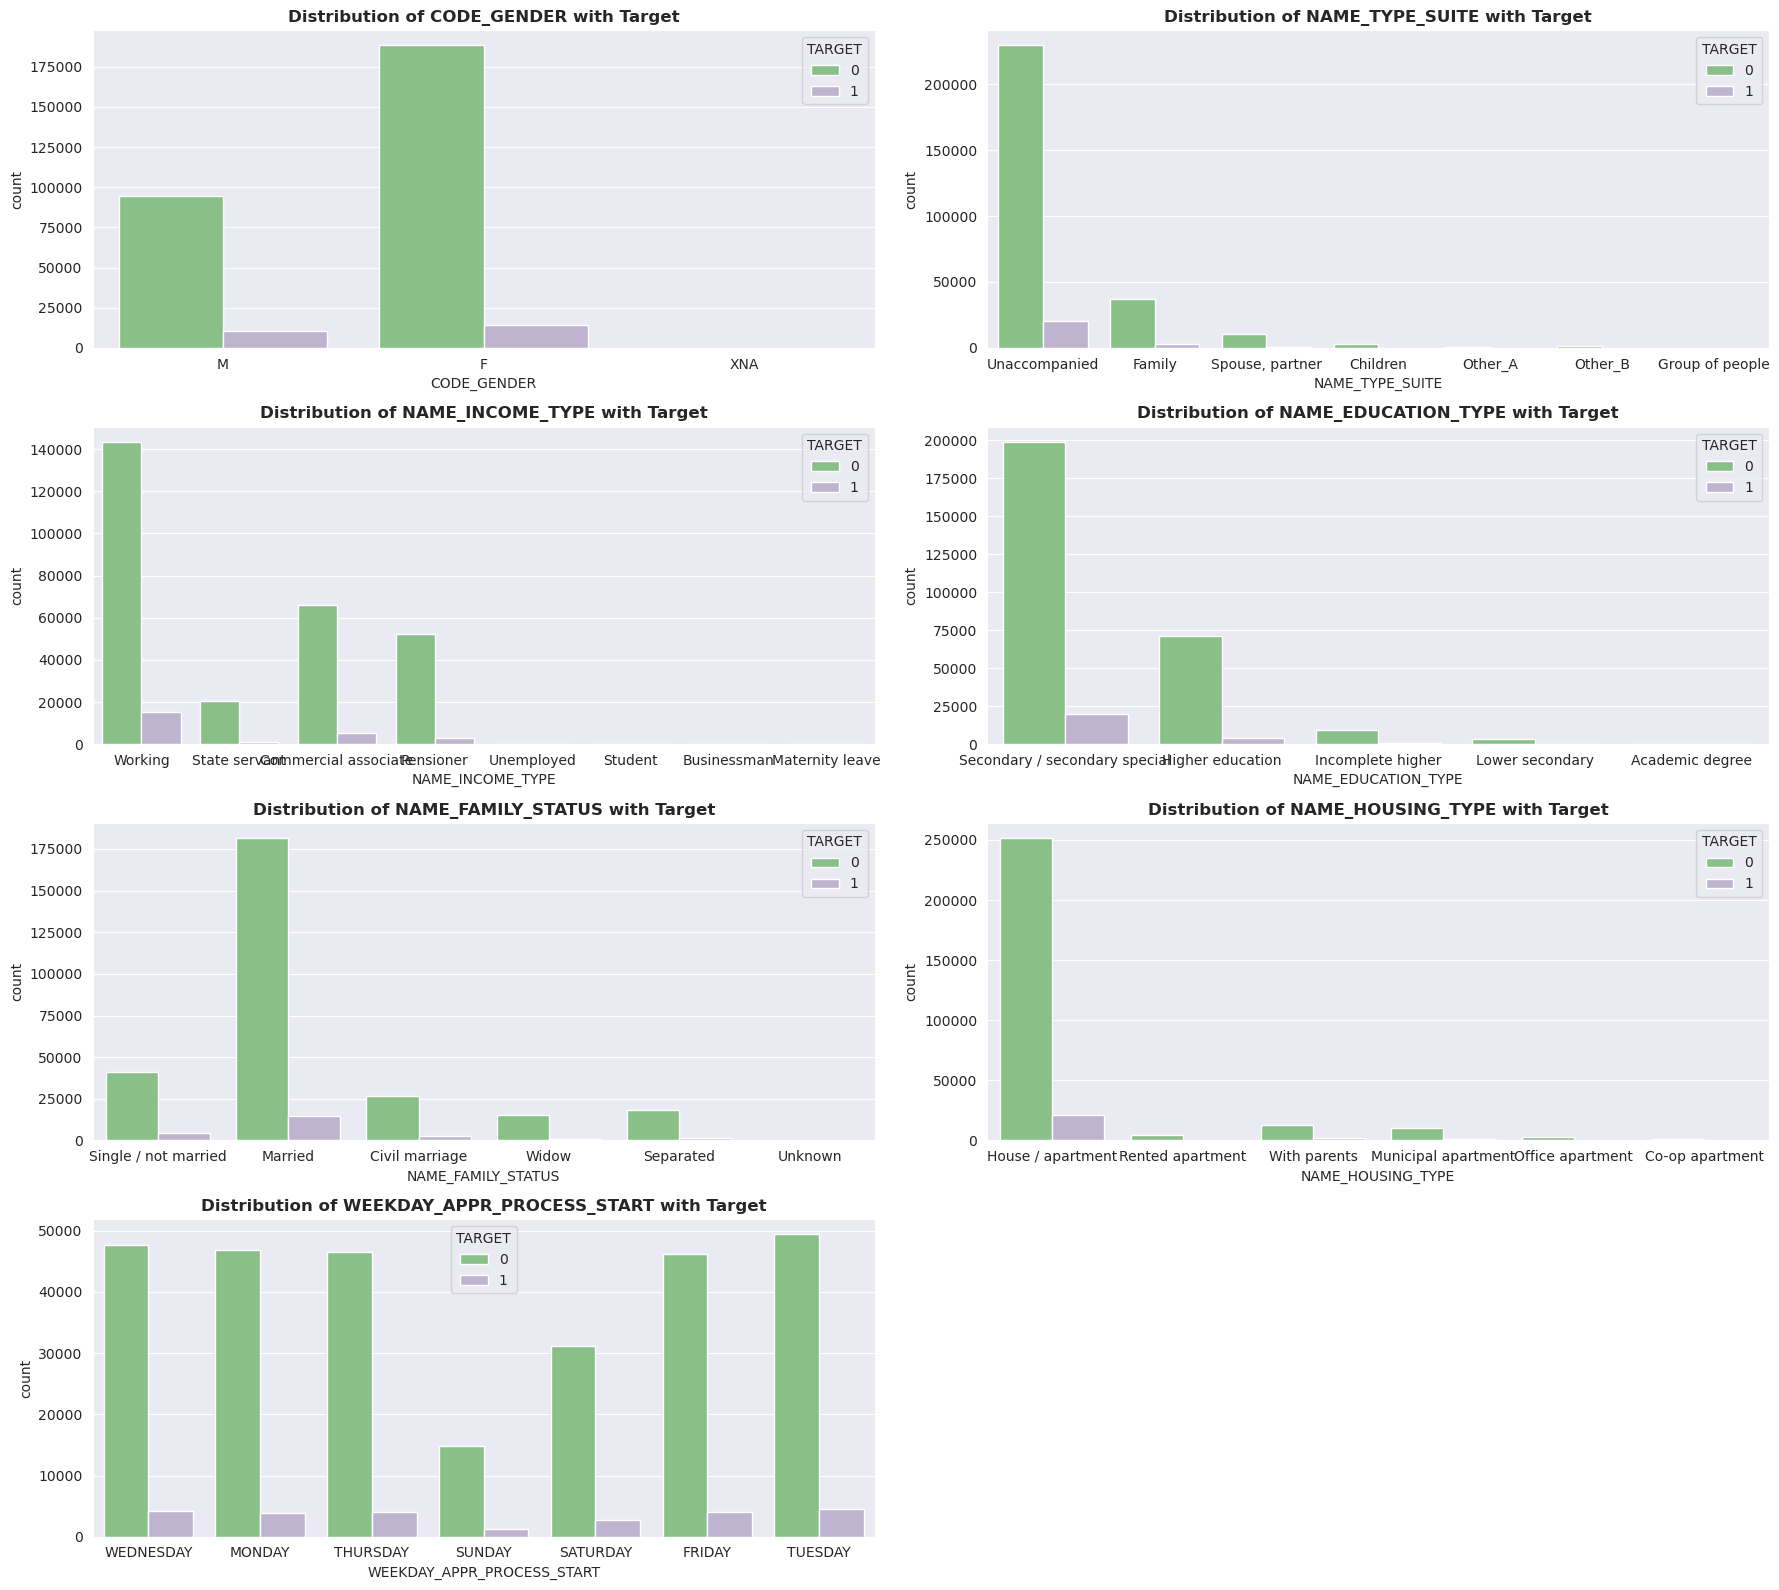

In [55]:
cols = ['CODE_GENDER', 'NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START']

# Countplot
plt.figure(figsize=(18,16))
for index, c in enumerate(cols):
    plt.subplot(4,2, index+1)
    sns.countplot(x=c, data=application_data_2, hue='TARGET', palette='Accent')
    plt.title(f"Distribution of {c} with Target", fontweight='bold')
    
plt.tight_layout()

#### Observations:
##### 1. Females are less likely to default the loan than male.
##### 2. Working client, Commercial associate and Pensioner have taken more loans.
##### 3. Unaccompanied has taken most number of loans.
##### 4. Married client has received more number of credits.
##### 5. Most of the clients have their house apartment.
##### 6. All days have equal number of application received, except sunday. 

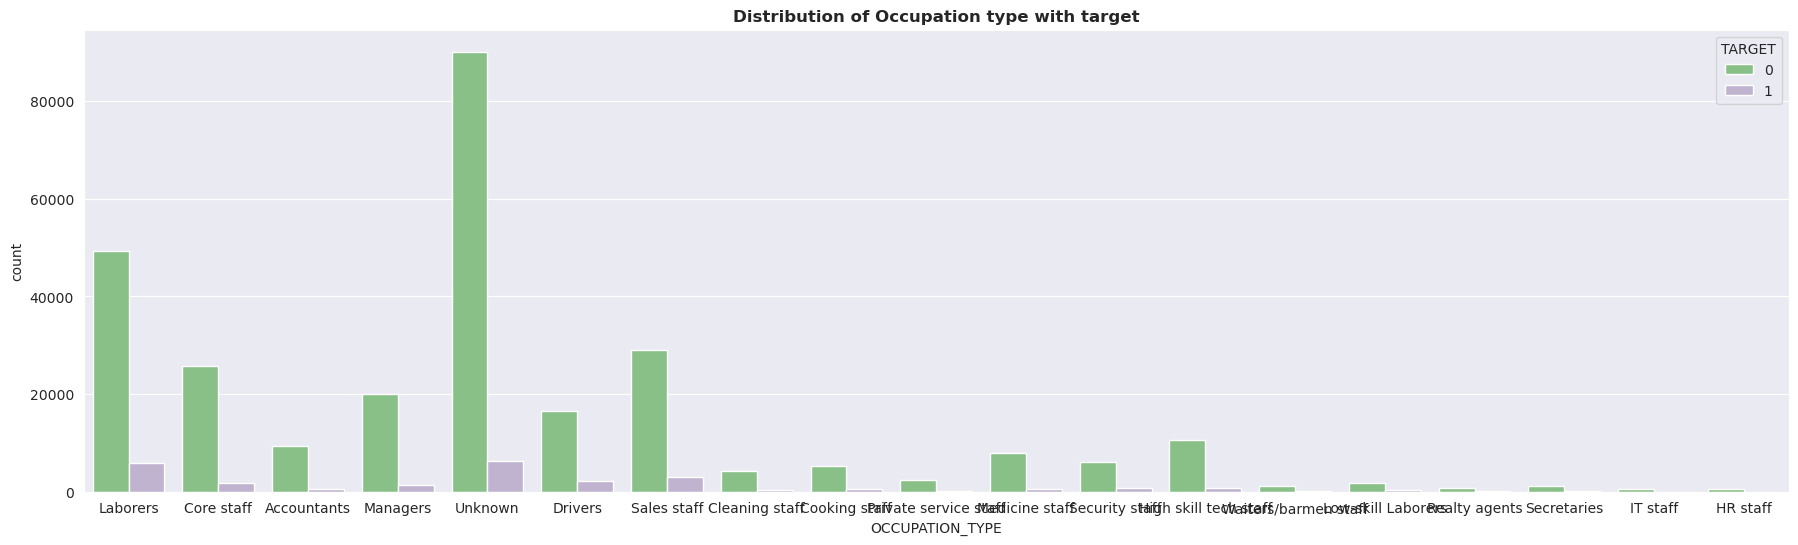

In [56]:
# OCCUPATION_TYPE
plt.figure(figsize=(22,6))
sns.countplot(x='OCCUPATION_TYPE', data=application_data_2, hue='TARGET', palette='Accent')
plt.title("Distribution of Occupation type with target", fontweight='bold')
plt.show()

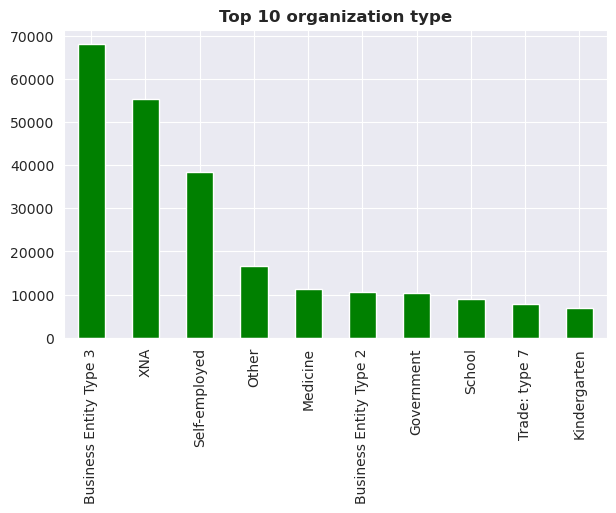

In [57]:
# Organization type
plt.figure(figsize=(7,4))
application_data_2['ORGANIZATION_TYPE'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar', color='green')
plt.title("Top 10 organization type", fontweight='bold')
plt.show()

In [58]:
# Numeric features and categorical features
num_features = application_data_2.select_dtypes(include=['int', 'float']).columns
num_cat_features = application_data_2.select_dtypes(include=['int', 'float', 'category']).columns

In [59]:
# Numeric dataframe
num_data = application_data_2[num_features]

defaulters = num_data[num_data['TARGET']==1]  # Dataframe for defaulters
repayers = num_data[num_data['TARGET']==0]   # Dataframe for non-defaulters

##### We have created the subset of numeric dataframe as the dataframe was unbalanced. One for storing all the defaulters and next for non-defaulters.

In [60]:
# Correlation 
defaulters.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.005144,-0.010165,-0.001290,-0.007578,-0.001814,0.006301,0.001254,-0.005161,-0.006342,0.002539,-0.003816,-0.005936,-0.004135,0.005004,-0.004249,0.004120,0.004303,0.008328,0.000787,-0.002929,-0.009424,-0.005567,-0.009087,-0.009440,-0.002455,-0.011106,-0.007388,-0.003075,0.005180,-0.001614,0.006843
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.005144,NaN,1.000000,0.004796,-0.001675,0.031257,-0.008111,-0.031975,-0.259109,-0.192864,-0.149154,0.032299,0.885484,0.040680,0.043185,-0.023899,-0.024322,-0.020793,-0.012073,-0.001174,0.046115,0.053515,0.025909,0.001520,0.025285,-0.005039,-0.011547,0.000316,-0.011255,-0.009316,-0.008852,-0.013029,-0.027253
AMT_INCOME_TOTAL,-0.010165,NaN,0.004796,1.000000,0.038131,0.046421,0.037591,0.009135,-0.003096,-0.014977,-0.000158,0.004215,0.006654,-0.021486,-0.022808,0.013775,0.007577,0.014531,0.013409,-0.002223,-0.003019,-0.001353,-0.004682,-0.005170,-0.004588,-0.004852,0.002429,0.001079,0.000135,0.000941,0.005718,0.001037,0.004516
AMT_CREDIT,-0.001290,NaN,-0.001675,0.038131,1.000000,0.752195,0.982783,0.069161,0.135316,0.001930,0.025854,0.052329,0.051224,-0.059193,-0.071377,0.031782,0.019540,0.033260,0.033554,-0.033034,-0.037720,-0.016509,0.019856,-0.025503,0.020242,-0.030461,0.110851,-0.003771,0.004346,0.010598,0.056227,-0.007201,-0.020698
AMT_ANNUITY,-0.007578,NaN,0.031257,0.046421,0.752195,1.000000,0.752295,0.071690,0.014303,-0.081207,-0.034279,0.016767,0.075711,-0.073784,-0.089291,0.031236,0.034807,0.066565,0.064109,-0.005745,0.001997,0.009902,0.005432,-0.021794,0.006465,-0.026966,0.079870,0.012968,0.000074,0.028784,0.049000,-0.007261,-0.009819
AMT_GOODS_PRICE,-0.001814,NaN,-0.008111,0.037591,0.982783,0.752295,1.000000,0.076053,0.135738,0.006648,0.025661,0.056061,0.047367,-0.066367,-0.077170,0.044302,0.022406,0.036285,0.035505,-0.034085,-0.038915,-0.016703,0.020537,-0.021379,0.021009,-0.025822,0.118232,-0.002451,0.005457,0.010793,0.059112,-0.006114,-0.022811
REGION_POPULATION_RELATIVE,0.006301,NaN,-0.031975,0.009135,0.069161,0.071690,0.076053,1.000000,0.048190,0.015532,0.056222,0.015537,-0.030163,-0.443236,-0.446977,0.142744,-0.022129,0.022256,0.046059,-0.059718,-0.052369,-0.020428,0.006172,0.025824,0.006741,0.018199,0.055139,-0.000710,-0.004546,0.003485,0.065248,-0.004433,0.003198
DAYS_BIRTH,0.001254,NaN,-0.259109,-0.003096,0.135316,0.014303,0.135738,0.048190,1.000000,0.582185,0.289114,0.252863,-0.203267,-0.033928,-0.033631,-0.062172,-0.054654,-0.069564,-0.045517,-0.161858,-0.215192,-0.123623,0.005161,-0.004939,0.005388,-0.003994,0.111199,-0.011650,0.007956,0.008244,0.010923,0.022904,0.083838
DAYS_EMPLOYED,-0.005161,NaN,-0.192864,-0.014977,0.001930,-0.081207,0.006648,0.015532,0.582185,1.000000,0.192455,0.229090,-0.186515,0.003490,0.002888,-0.060000,-0.035025,-0.091145,-0.078787,-0.088177,-0.245827,-0.198484,-0.008213,0.003066,-0.008498,0.005280,0.001402,-0.007307,0.019381,0.013237,-0.023088,0.012230,0.030812


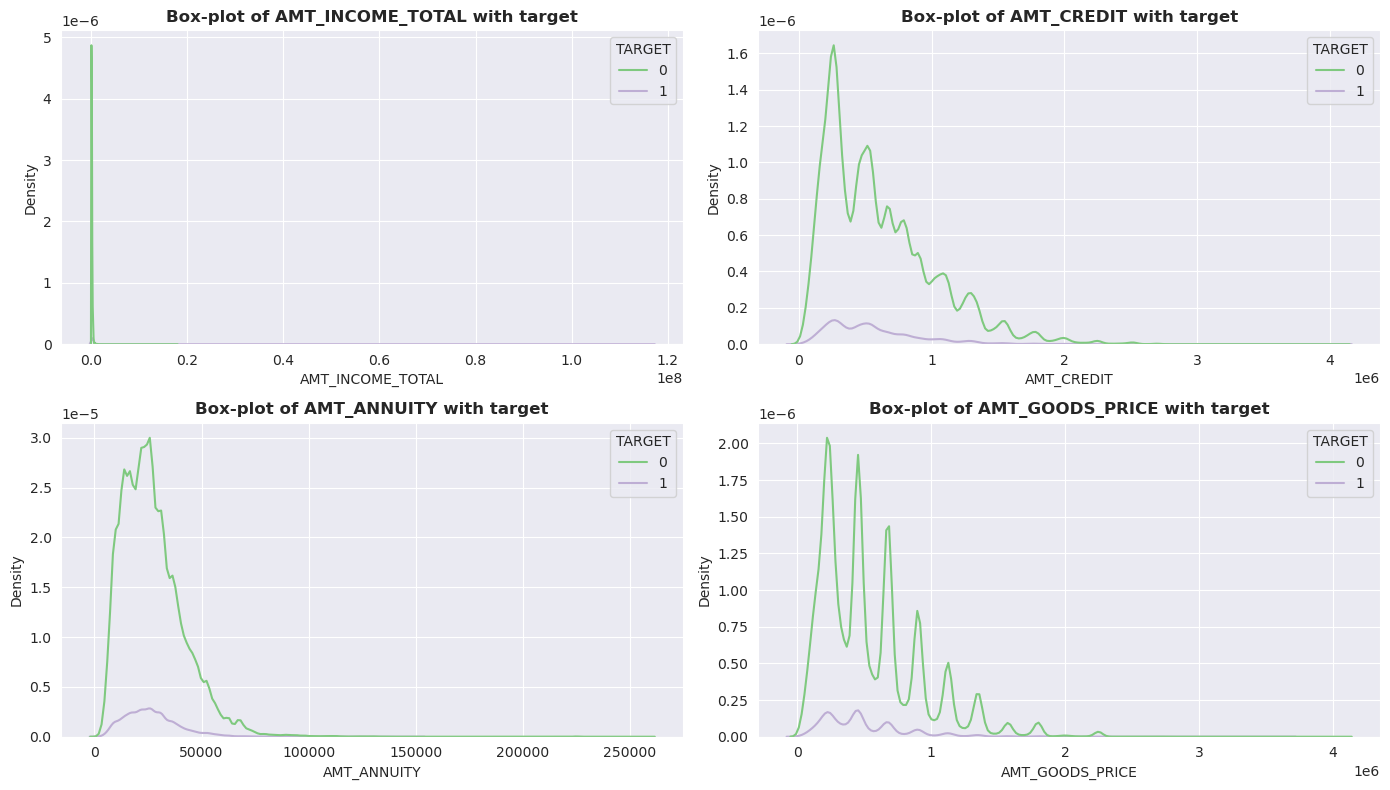

In [61]:
# Amt_features
amt_var = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

plt.figure(figsize=(14,8))
for index, k in enumerate(amt_var):
    plt.subplot(2,2, index+1)
    sns.kdeplot(x=k, data=num_data, hue='TARGET', palette='Accent')
    plt.title(f"Box-plot of {k} with target", fontweight='bold')
    
plt.tight_layout()
    

Observations:
1. Most of the defaulters are from high-income groups.
2. Most defaulters fall under the category of amt_credit between 0 to 1 million.
3. Annuity payment of 0 to 50000 have more number of defaults.
4. Amount goods price between o to 1 million have more number of defaults.

In [62]:
num_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,2.0,2,2,17,0,0,0,0,0,0,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,1.0,2,2,11,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


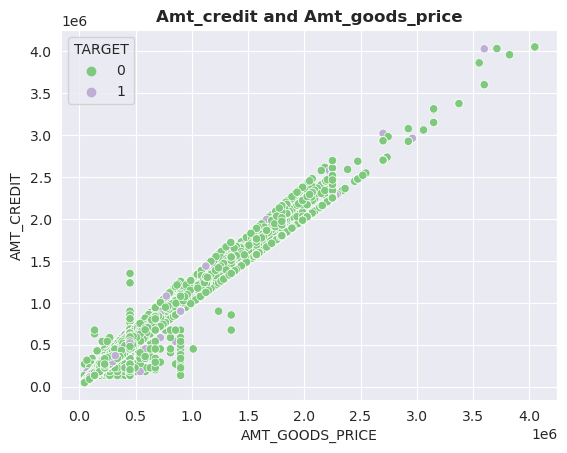

In [63]:
# Scatter plot
sns.scatterplot(data=num_data, x='AMT_GOODS_PRICE', y='AMT_CREDIT', palette='Accent', hue='TARGET')
plt.title("Amt_credit and Amt_goods_price", fontweight='bold')
plt.show()

##### As can be seen, Amt_goods_price and Amt_credit have linear relation. And, most of the defaulters are under 1 million level.

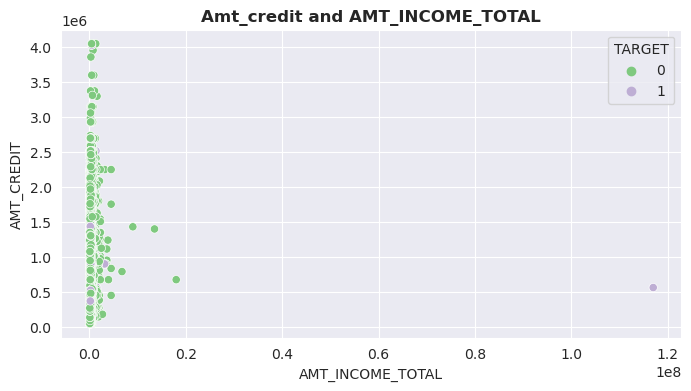

In [64]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=num_data, x='AMT_INCOME_TOTAL', y='AMT_CREDIT', palette='Accent', hue='TARGET')
plt.title("Amt_credit and AMT_INCOME_TOTAL", fontweight='bold')
plt.show()

##### People with income less than 1 million is taking more number of loans. And, people who got credit/loans less than 150,000 are more likely to default.

## Previous Application Data

In [65]:
# Missing values
null_counts = (previous_app_data.isna().sum().sort_values(ascending=False) / previous_app_data.shape[0]*100).reset_index(name='missing_value_percent')
null_counts

,index,missing_value_percent
0,RATE_INTEREST_PRIVILEGED,99.643698
1,RATE_INTEREST_PRIMARY,99.643698
2,AMT_DOWN_PAYMENT,53.636480
3,RATE_DOWN_PAYMENT,53.636480
4,NAME_TYPE_SUITE,49.119754
5,NFLAG_INSURED_ON_APPROVAL,40.298129
6,DAYS_TERMINATION,40.298129
7,DAYS_LAST_DUE,40.298129
8,DAYS_LAST_DUE_1ST_VERSION,40.298129
9,DAYS_FIRST_DUE,40.298129


In [66]:
# Features having missing values > 40%
var_msng_more_than_40 = list(null_counts[null_counts['missing_value_percent']>=40]['index'])
var_msng_more_than_40 

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING']

In [67]:
# No value features
non_value_cols = var_msng_more_than_40 + ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                                         'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
non_value_cols

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY']

In [68]:
# Drop non_value_cols
previous_app_data_1 = previous_app_data.drop(columns=non_value_cols)
previous_app_data_1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [69]:
previous_app_data_1.shape

(1670214, 22)

## Handling Missing Values

In [70]:
# Missing values
previous_app_data_1.isna().sum().sort_values(ascending=False)/previous_app_data_1.shape[0]*100

AMT_GOODS_PRICE           23.081773
AMT_ANNUITY               22.286665
CNT_PAYMENT               22.286366
PRODUCT_COMBINATION        0.020716
AMT_CREDIT                 0.000060
NAME_GOODS_CATEGORY        0.000000
NAME_YIELD_GROUP           0.000000
NAME_SELLER_INDUSTRY       0.000000
SELLERPLACE_AREA           0.000000
CHANNEL_TYPE               0.000000
NAME_PRODUCT_TYPE          0.000000
NAME_PORTFOLIO             0.000000
SK_ID_PREV                 0.000000
NAME_CLIENT_TYPE           0.000000
SK_ID_CURR                 0.000000
NAME_PAYMENT_TYPE          0.000000
DAYS_DECISION              0.000000
NAME_CONTRACT_STATUS       0.000000
NAME_CASH_LOAN_PURPOSE     0.000000
AMT_APPLICATION            0.000000
NAME_CONTRACT_TYPE         0.000000
CODE_REJECT_REASON         0.000000
dtype: float64

In [71]:
# Mean and Median
previous_app_data_1['AMT_GOODS_PRICE'].agg(func=['mean', 'median'])

mean      227847.279283
median    112320.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [72]:
amt_goods_price_median_fill = previous_app_data_1['AMT_GOODS_PRICE'].fillna((previous_app_data_1['AMT_GOODS_PRICE'].median()))

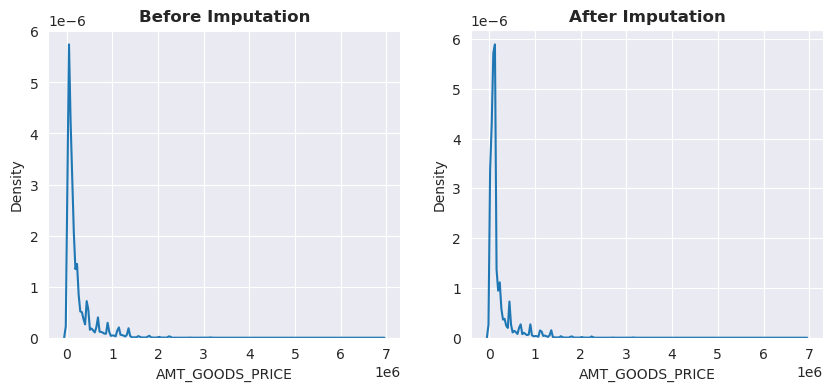

In [73]:
# Comparision before and after imputation
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(previous_app_data_1['AMT_GOODS_PRICE'])
plt.title("Before Imputation", fontweight='bold')

plt.subplot(1,2,2)
sns.kdeplot(amt_goods_price_median_fill)
plt.title("After Imputation", fontweight='bold')
plt.show()

##### As can be seen, our data distribution have not changed after median imputation. So, we would go with median imputation for missing values.

In [74]:
# Median Imputation
previous_app_data_1['AMT_GOODS_PRICE'] = previous_app_data_1['AMT_GOODS_PRICE'].fillna((previous_app_data_1['AMT_GOODS_PRICE'].median()))

In [75]:
amt_annuity_median_fill = previous_app_data_1['AMT_ANNUITY'].fillna((previous_app_data_1['AMT_ANNUITY'].median()))

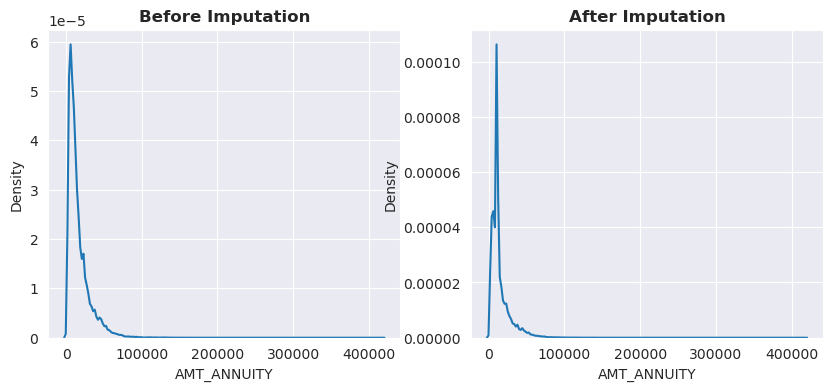

In [76]:
# Comparision before and after imputation
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(previous_app_data_1['AMT_ANNUITY'])
plt.title("Before Imputation", fontweight='bold')

plt.subplot(1,2,2)
sns.kdeplot(amt_annuity_median_fill)
plt.title("After Imputation", fontweight='bold')
plt.show()

In [77]:
# Imputing with median values
previous_app_data_1['AMT_ANNUITY'] = previous_app_data_1['AMT_ANNUITY'].fillna((previous_app_data_1['AMT_ANNUITY'].median()))

In [78]:
# PRODUCT_COMBINATION
previous_app_data_1['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [79]:
# PRODUCT_COMBINATION Imputation with mode
previous_app_data_1['PRODUCT_COMBINATION'] = previous_app_data_1['PRODUCT_COMBINATION'].fillna((previous_app_data_1['PRODUCT_COMBINATION'].mode()[0]))

In [80]:
# AMT_CREDIT
previous_app_data_1['AMT_CREDIT'] = previous_app_data_1['AMT_CREDIT'].fillna((previous_app_data_1['AMT_CREDIT'].median()))

In [81]:
# NAME_CONTRACT_STATUS
previous_app_data_1['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

##### We can fill CNT_PAYMENT with mean/median because it does not hampers NAME_CONTRACT_STATUS feature. Majority of application was Approved.So, no worries about median imputation.

In [82]:
# CNT_PAYMENT
previous_app_data_1['CNT_PAYMENT'] = previous_app_data_1['CNT_PAYMENT'].fillna((previous_app_data_1['CNT_PAYMENT'].median()))

In [83]:
previous_app_data_1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [84]:
application_data_2.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY',

In [85]:
# Combine both dataframes
merged_data = pd.merge(application_data_2,previous_app_data_1, how='inner', on='SK_ID_CURR' )
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amt_credit_category,Amt_goods_price_category,Amt_annuity_category,Amt_income_category,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,250001 - 500000,300001 - 500000,20001 - 50000,200001 - 300000,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,1000001 - 5000000,1000001 - 5000000,20001 - 50000,200001 - 300000,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,1000001 - 5000000,1000001 - 5000000,20001 - 50000,200001 - 300000,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,1000001 - 5000000,1000001 - 5000000,20001 - 50000,200001 - 300000,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,100001 - 150000,100001 - 200000,0 - 20000,0 - 100000,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


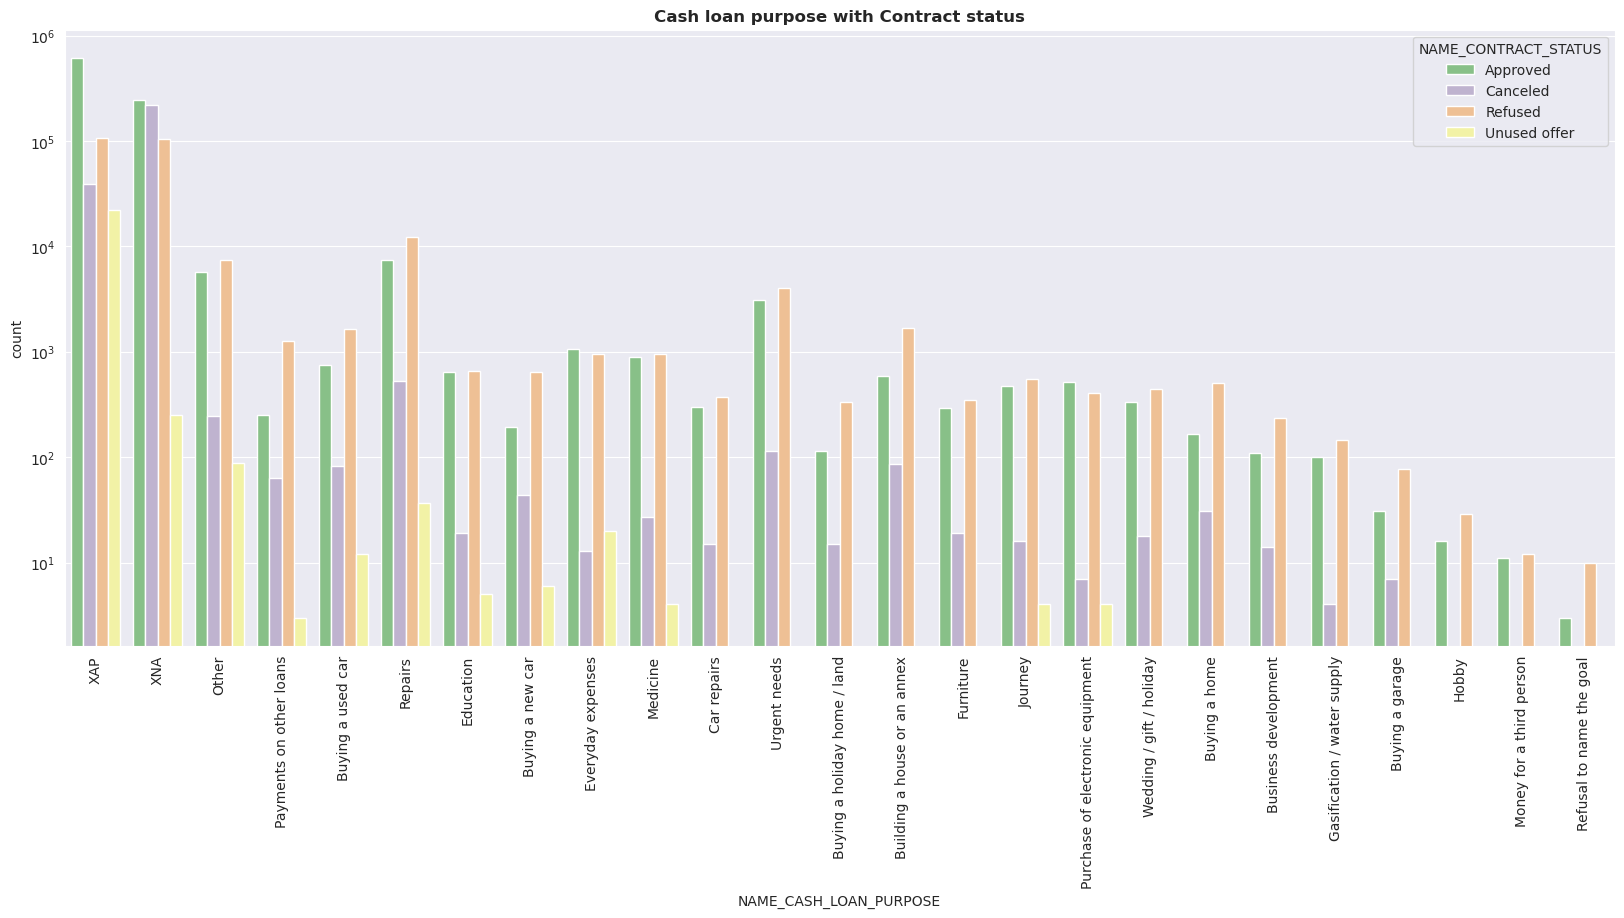

In [86]:
# NAME_CASH_LOAN_PURPOSE with NAME_CONTRACT_STATUS
plt.figure(figsize=(20,8))

sns.countplot(data=merged_data, x='NAME_CASH_LOAN_PURPOSE', hue='NAME_CONTRACT_STATUS', palette='Accent')
plt.title("Cash loan purpose with Contract status", fontweight='bold')
plt.xticks(rotation=90, fontweight=14)
plt.yscale('log')
plt.show()

Observations:
1. For Repair purpose, client have applied previously most application. And, same category have most number of cancellation.

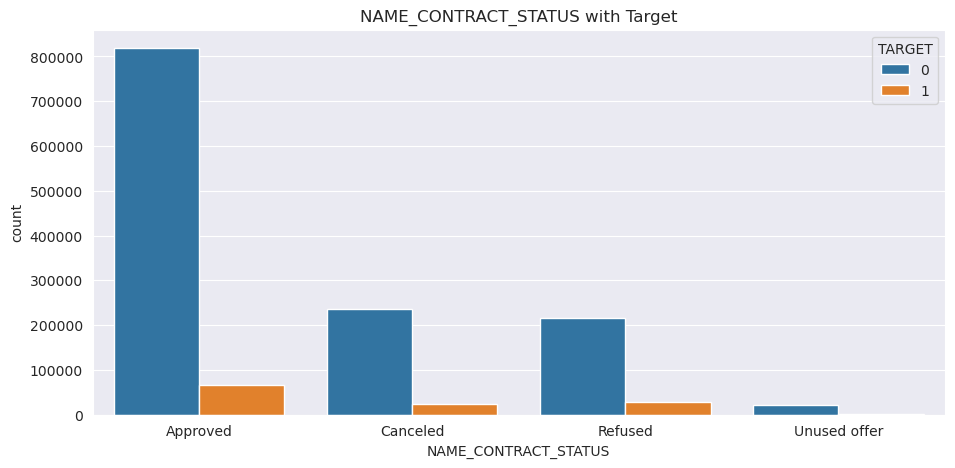

In [87]:
# NAME_CONTRACT_STATUS with Target
plt.figure(figsize=(11,5))
sns.countplot(data=merged_data, x='NAME_CONTRACT_STATUS', hue='TARGET')
plt.title("NAME_CONTRACT_STATUS with Target")
plt.show()

##### Most of the application which were previously Cancelled or Rufused , 80 to 90 percent of them are repaired in current year.

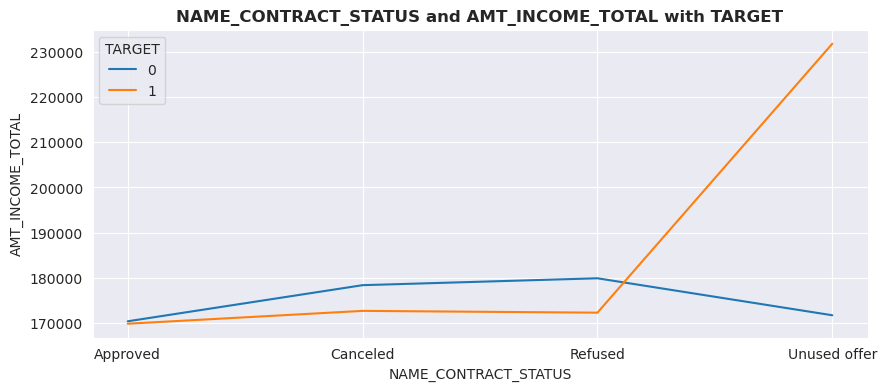

In [88]:
# Lineplot
plt.figure(figsize=(10,4))
sns.lineplot(data=merged_data, x='NAME_CONTRACT_STATUS', y='AMT_INCOME_TOTAL', errorbar=None, hue='TARGET' )
plt.title("NAME_CONTRACT_STATUS and AMT_INCOME_TOTAL with TARGET", fontweight='bold')
plt.show()

##### The offer which was unused previously has high chance of defaulting the loan.

We can do more analysis on the dataset. Actually, analysis should be done to find the answer of questions asked by your managers and to solve the issues regarding the business. Currently, we are stopping our analysis. If you like, you can go further also.

## Recommendations:
1. Bank should give focus on providing the cash loan than revolving loan as cash loan are less likely to default.
2. Female loan has less default rate. So, the bank should give a little bit priority to females.
3. Those clients who do not have any accompany should be focused.
4. Safest segementation of employment are workers, commercial associates and pensioners.
5. Client who have the higher education should be given more loans.
6. Married clients are safer than unmarried.
7. People having house/apartment are safer to provide loans.
8. Low-skill laborers and drivers should be given less priority as they have high probability of making
   defaults.
9. People having income less than 1 million and taking loans near to 1 million have higher chance of      defaults. So, should not be given focus.
10. Married couples having children less than five are safe for providng loans.
11. Client having annuity less than 100K are safer side for the bank.
12. 80-90% of customers who were previously cancelled/ refused are repayers. So. banks have to reverify     the those applications.
13. The offer which was unused previously should not be given loans despite of having high incomes. These clients have maximum chance of defaulting the loans.